<a href="https://colab.research.google.com/github/lmlouis/IntroductionIA/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Regression:**

In this checkpoint, we are going to work again on the Titanic data set, but this time we will use logistic regression to predict if a passenger will survive or not. 

1. Apply logistic regression. 

2. Use a confusion matrix to validate your model. 

3. Another validation matrix for classification is ROC / AUC. Do your research on them, explain them, and apply them in our case.



In [ ]:
from google.colab import drive # import google colab 
drive.mount('/gdrive') # importer google drive 


import os 

Mounted at /gdrive


Durant le checkpoint Datavisualization nous avons pu pré-traiter et analyser le dataframe du titanic donc nous passerons direction aux phase d'analyse et model de regression logistic 

In [ ]:
# chemin du fichier 
dataPath = '/gdrive/MyDrive/Gomycode /Introduction a IA /cours6/checkpoint/titanicPreprocessing.csv'  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv(dataPath)
df.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,Fare,Title,FamilySize
0,0,0,2,1,28.0,13.0000,Mrs,0
1,1,0,3,1,25.0,7.6500,Mrs,0
2,2,0,3,1,20.0,7.8542,Mrs,0
3,3,0,3,0,29.0,21.0750,Mrs,4
4,4,0,1,1,31.0,52.0000,Mrs,1


# preparing data for logistic regression

on va supprimer la colone 'Unnamed: 0' et transformer Title en valeurs numérique 

In [39]:
df.drop(columns='Unnamed: 0', axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare,Title,FamilySize
0,0,2,1,28.0,13.0000,Mrs,0
1,0,3,1,25.0,7.6500,Mrs,0
2,0,3,1,20.0,7.8542,Mrs,0
3,0,3,0,29.0,21.0750,Mrs,4
4,0,1,1,31.0,52.0000,Mrs,1


In [42]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
df.Title = labelencoder.fit_transform(df.Title)
df.Title

0      2
1      2
2      2
3      2
4      2
      ..
886    2
887    2
888    1
889    2
890    1
Name: Title, Length: 891, dtype: int64


#Regression Logistic

dataset vue d'ensemble 

In [43]:
data = df.copy()
data.head()

,Survived,Pclass,Sex,Age,Fare,Title,FamilySize
0,0,2,1,28.0,13.0000,2,0
1,0,3,1,25.0,7.6500,2,0
2,0,3,1,20.0,7.8542,2,0
3,0,3,0,29.0,21.0750,2,4
4,0,1,1,31.0,52.0000,2,1


In [48]:
data.describe()

,Survived,Pclass,Sex,Age,Fare,Title,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699293,32.204208,1.738496,0.904602
std,0.486592,0.836071,0.477990,13.002015,49.693429,0.619958,1.613459
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910400,1.000000,0.000000
50%,0.000000,3.000000,1.000000,29.700000,14.454200,2.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,31.000000,2.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,5.000000,10.000000


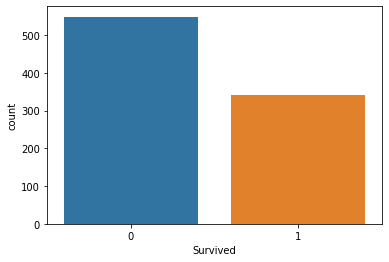

In [45]:
sns.countplot(x='Survived',data=data)

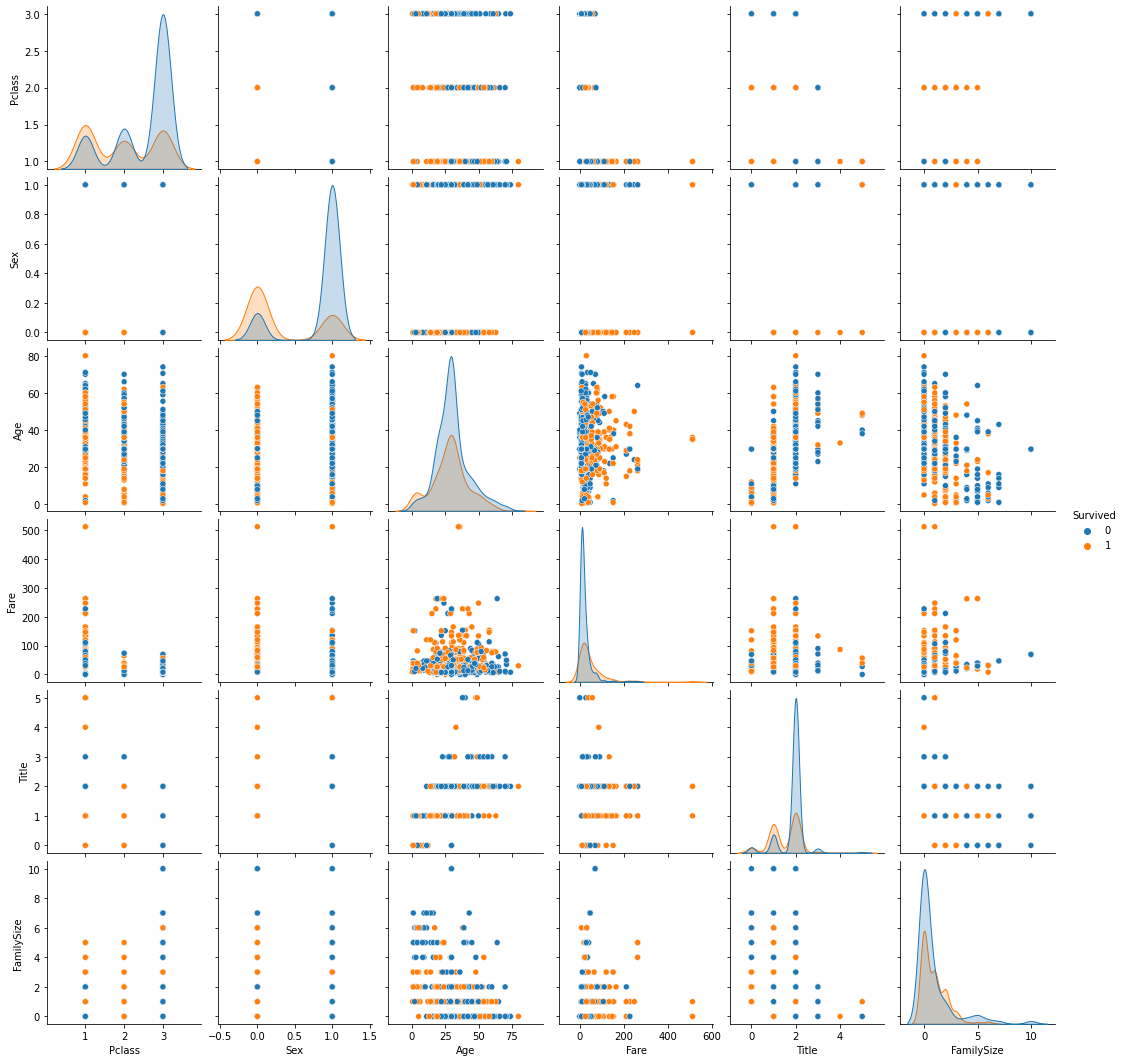

In [91]:
sns.pairplot(data=data, hue='Survived')

## features extraction

Séparons les variable dépendantes des variables indépendantes 

**x** (*indepandante*): contient les colones Pclass, Sex,	Age,	Fare,	Title, FamilySize 

**y** (*dependante*): contient la colone Survived 

In [90]:
x = data.iloc[:, 1:] 
y = data.iloc[:, 0]

print('x.shape = ',x.shape)
print('y.shape = ',y.shape)

x.shape =  (891, 6)
y.shape =  (891,)


## splitting data with test size of 25%
Séparer nos données en données de test et de training 

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  

##Logistic Model

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
LogisticModel = LogisticRegression() # logistic model
LogisticModel.fit(x_train, y_train)  #fitting training data
y_pred  = LogisticModel.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(LogisticModel.score(x_test, y_test)))

Accuracy=0.83


# Confusion Matrix

On va valider notre model gràve la matrice de confusion

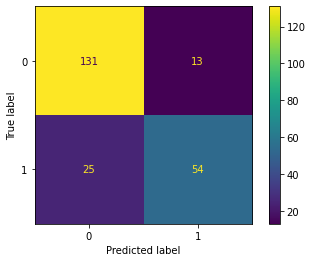

In [118]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cofusionMatrix = confusion_matrix(y_test, y_pred)

cofusionMatrix_display = ConfusionMatrixDisplay(cofusionMatrix).plot()

In [127]:
cm = pd.DataFrame(cofusionMatrix, columns=['Non Survivant Predit', 'Survivant Predit'], index=['Non Survivant Réel', 'Survivant Réel'])
cm

,Non Survivant Predit,Survivant Predit
Non Survivant Réel,131,13
Survivant Réel,25,54


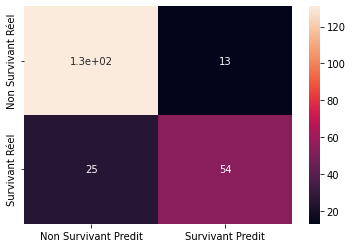

In [128]:
sns.heatmap(cm, annot=True)

## Interpretation 

* 131 non survivants prédits par le modèle n'ont pas survécu. 
* 25 non survivants prédits par le modèle ont survécu.
* 13 survivants prédits par le modèle n'ont pas survécu.
* 54 survivants prédits par le modèle ont survécu. 

# Classification report 

In [136]:
from sklearn.metrics import classification_report

report =  classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       144
           1       0.81      0.68      0.74        79

    accuracy                           0.83       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.83      0.83      0.83       223



# validation matrix for classification is ROC / AUC.
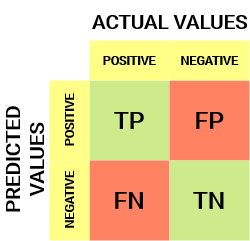

Sensitivity / True Positive Rate / Recall

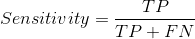

False Negative Rate (FNR)

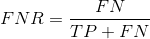

Specificity / True Negative Rate

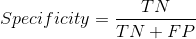

False Positive Rate

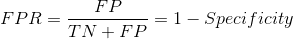




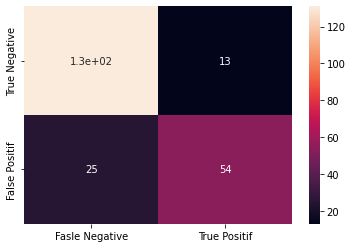

In [138]:
cm = pd.DataFrame(cofusionMatrix, columns=['Fasle Negative', 'True Positif'], index=['True Negative', 'False Positif'])
sns.heatmap(cm, annot=True)

In [143]:
TN=cm.iloc[0,0]
TP=cm.iloc[1,1]
FN=cm.iloc[1,0]
FP=cm.iloc[0,1]
print(f"TN = {TN}")
print(f"TP = {TP}")
print(f"FN = {FN}")
print(f"FP = {FP}")

TN = 131
TP = 54
FN = 25
FP = 13


In [150]:
# Sensitivity / True Positive Rate / Recall
sensitivity = TP/float(TP+FN)
print(f"sensitivity (True Positive Rate / Recall) = {sensitivity}")

sensitivity (True Positive Rate / Recall) = 0.6835443037974683


In [146]:
# False Negative Rate (FNR)
FNR = FN / float(TP+FN)
print(f"False Negative Rate (FNR) = {FNR}")

False Negative Rate (FNR) = 0.31645569620253167


In [152]:
# Specificity / True Negative Rate
Specificity  = TN/float(TP+FP)
print(f"Specificity  (True Negative Rate) = {Specificity }")

Specificity  (True Negative Rate) = 1.955223880597015


In [154]:
# False Positive Rate
FPR = 1 - Specificity
print(f"FPR  (False Positive Rate) = {FPR}")

FPR  (False Positive Rate) = -0.955223880597015


## ROC / AUC  Score 
c'est une métrique à l'instar du accuray 

Calculer l'aire sous la courbe de la caractéristique d'exploitation du récepteur (ROC AUC) à partir des scores de prédiction.

In [175]:
from sklearn.metrics import roc_auc_score
roc_auc =  roc_auc_score(y_test, y_pred)
print(f"roc_auc = {roc_auc} ")

roc_auc = 0.7966332630098454 


## ROC Curve

Les courbes ROC présentent généralement feature true positive rate sur l'axe des ordonnées et false positive rate sur l'axe des abscisses. Cela signifie que le coin supérieur gauche du graphique est le point "idéal" - un false positive rate  de zéro et un true positive rate de un. Ce n'est pas très réaliste, mais cela signifie qu'une aire sous la courbe (AUC : area under the curve ) plus grande est généralement meilleure.

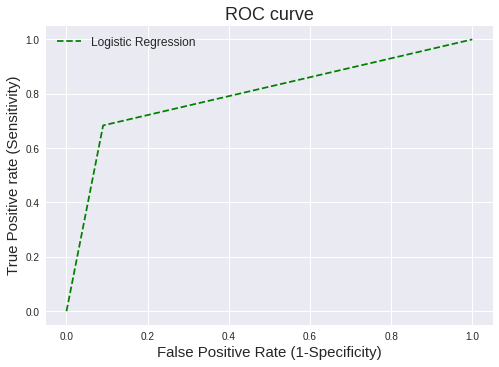

In [182]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from sklearn.metrics import roc_curve
FPR, sensitivity, thresholds = roc_curve(y_test, y_pred)

# plot roc curves
plt.plot(FPR, sensitivity, linestyle='--',color='green', label='Logistic Regression')

# title
plt.title('ROC curve', fontsize=18)
# x label
plt.xlabel('False Positive Rate (1-Specificity)' , fontsize=15)
# y label
plt.ylabel('True Positive rate (Sensitivity)', fontsize=15)

plt.legend(loc='best', fontsize=12)
plt.savefig('ROC',dpi=300)
plt.show();

## Interpretation

le coin supérieur gauche où 0.0 < FPR < 0.2 et 0.6 < sensitivity < 0.8 est le point idéal 